# Pre-processing Allocation data for WaDE upload.
- Purpose:  To pre-process the data into one main file for simple DataFrame creation and extraction

In [1]:
import os
import sys
print(os.environ['CONDA_DEFAULT_ENV'])
print(sys.version)

base
3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


In [2]:
# Needed Libraries / Modules

# ---- working with data ----
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [3]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Nebraska/WaterAllocation" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Nebraska/WaterAllocation


## POD Surface Water Data - API
- data already pulled from api, used saved csv instead

In [4]:
# %%time
# # Use AllSurfaceWaterPoints API retrieval, besure to set a countPage variable value.
# df = pd.DataFrame()
# countPage = 1
# while countPage < 50:
#     url = "https://nednr.nebraska.gov/IwipApi/api/v1/WaterRights/AllSurfaceWaterPoints?page=" + str(countPage)
#     # store in dataframe
#     try:
#         responseD = json.loads(requests.get(url).text)
#         DtL = responseD['Results']
#         length = len(DtL)
#         for i in range(length):
#             row = pd.DataFrame([DtL[i]])
#             df = pd.concat([df, row])
#     except:
#         print(url)
#         print("Error, issue with API return.")
    
#     countPage = countPage + 1

# print(len(df))
# df.head(1)

In [5]:
# # already done, skip ahead

# # explode these list....
# dftemp = df.copy()
# dftemp = dftemp.explode('PumpSheets')
# dftemp = dftemp.explode('NoticeExemptions')
# dftemp = dftemp.explode('SpecialConditions')
# dftemp = dftemp.explode('Notices')
# dftemp = dftemp.explode('PointOfDiversions')
# dftemp = dftemp.explode('Contacts')

# print(len(dftemp))
# dftemp.head(1)

In [6]:
# # already done, skip ahead

# # To unpack column's dictionary value new into separate columns -> contact to existing dataframe -> drop unpacked column
# dftemp = pd.concat([dftemp, dftemp["Notices"].apply(pd.Series)], axis=1).drop(columns="Notices")
# dftemp = pd.concat([dftemp, dftemp["PointOfDiversions"].apply(pd.Series)], axis=1).drop(columns="PointOfDiversions")
# dftemp = pd.concat([dftemp, dftemp["Contacts"].apply(pd.Series)], axis=1).drop(columns="Contacts")

# print(len(dftemp))
# dftemp.head(1)

In [7]:
# # already done, skip ahead

# # export api data
# dftemp.to_csv('RawInputData/AllSurfaceWaterPoints.zip', compression=dict(method='zip', archive_name='AllSurfaceWaterPoints.csv'), index=False)  # The output, save as a zip

In [8]:
# Input File
FI_PoD = "RawInputData/AllSurfaceWaterPoints.zip"
dfinPOD = pd.read_csv(FI_PoD, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOD:
    dfinPOD['WaDEUUID'] = "d" + dfinPOD.index.astype(str)
    dfinPOD.to_csv('RawInputData/AllSurfaceWaterPoints.zip', compression=dict(method='zip', archive_name='AllSurfaceWaterPoints.csv'), index=False)

print(len(dfinPOD))
dfinPOD.head(3)

C:\Users\rjame\AppData\Local\Temp\ipykernel_16940\18083425.py:3: DtypeWarning: Columns (18,20,23,24,35,36,68,71,75) have mixed types. Specify dtype option on import or set low_memory=False.
  dfinPOD = pd.read_csv(FI_PoD, encoding = "ISO-8859-1").replace(np.nan, "")


1401420


,RightID,RightStatus,ApplicationName,StartDownStream,WaterDivision,FieldOffice,CarrierA,SourceName,InstantaneousGrant,CountInstantaneousGrant,VolumetricGrant,CountVolumetricGrant,ReservoirCapacity,GPM,AcresCounted,Rate,CurrentTotalAcres,AnnualReportRequired,Annotation,PriorityDate,BeneficialDate,ApprovalDate,LastOrderDate,IrrigationDistrict,CanalSystem,PermitGroup,IsDeleted,FlowType,PurposeOfUse,Incidental,Supplemental,OffChannelStorage,LatitudeDecimalDegrees,LongitudeDecimalDegrees,PumpSheets,NoticeExemptions,SpecialConditions,NoticeID,NoticeType,CreateDate,EffectiveDate,ReasonForAdminAction,Notes,DeleteNotice,0,Section,SubSection,Township,Range,RangeDirection,CountyName,NrdName,HUC12,Upstream,PrimaryIndicator,PODStatus,LegalDescription,LatitudeDecimalDegrees.1,LongitudeDecimalDegrees.1,0.1,ContactId,FirstName,LastName,ContactType,SeqNum,BeginDate,EndDate,Address1,Address2,City,State,Zip,Phone1,Phone2,Phone3,LicenseNumber,IsDeleted.1,0.2,WaDEUUID
0,1,Active,A-365R,8955.00000,1A,Bridgeport,Central Canal,North Platte River,0.04000,Yes,,No,,17.00000,No,,0.00000,No,U-29,1897-03-15T00:00:00,,1996-03-05T00:00:00,2011-04-26T00:00:00,Central Irrigation District,Central Canal,Public,False,Direct Flow,Incidental Underground Storage,Yes,No,No,41.85584,-103.70574,,,,3070.00000,Regulating,2024-08-23T08:55:08.1466667,2024-08-22T00:00:00,Gage Height Posting,Natural Flow Limit. Updated shift from measure...,No,,28.00000,NE NW,22.00000,55.00000,West,Scotts Bluff,North Platte,101800090810.00000,Yes,Primary,Active,NE NW S28 T22N-R55W,41.85584,-103.70574,,754.00000,,Central Irrigation District,Owner,1.00000,,,230450 Crow Road,,Gering,Nebraska,69341,3086413425.00000,,,,No,,d0
1,1,Active,A-365R,8955.00000,1A,Bridgeport,Central Canal,North Platte River,0.04000,Yes,,No,,17.00000,No,,0.00000,No,U-29,1897-03-15T00:00:00,,1996-03-05T00:00:00,2011-04-26T00:00:00,Central Irrigation District,Central Canal,Public,False,Direct Flow,Incidental Underground Storage,Yes,No,No,41.85584,-103.70574,,,,2986.00000,Regulating,2024-07-30T10:51:27.7766667,2024-07-31T00:00:00,Gage Height Posting,Natural Flow Limit. Updated shift from measur...,No,,28.00000,NE NW,22.00000,55.00000,West,Scotts Bluff,North Platte,101800090810.00000,Yes,Primary,Active,NE NW S28 T22N-R55W,41.85584,-103.70574,,754.00000,,Central Irrigation District,Owner,1.00000,,,230450 Crow Road,,Gering,Nebraska,69341,3086413425.00000,,,,No,,d1
2,1,Active,A-365R,8955.00000,1A,Bridgeport,Central Canal,North Platte River,0.04000,Yes,,No,,17.00000,No,,0.00000,No,U-29,1897-03-15T00:00:00,,1996-03-05T00:00:00,2011-04-26T00:00:00,Central Irrigation District,Central Canal,Public,False,Direct Flow,Incidental Underground Storage,Yes,No,No,41.85584,-103.70574,,,,2959.00000,Regulating,2024-07-18T12:10:17.7266667,2024-07-18T00:00:00,Gage Height Posting,Natural Flow Limit. Updated shift from measur...,No,,28.00000,NE NW,22.00000,55.00000,West,Scotts Bluff,North Platte,101800090810.00000,Yes,Primary,Active,NE NW S28 T22N-R55W,41.85584,-103.70574,,754.00000,,Central Irrigation District,Owner,1.00000,,,230450 Crow Road,,Gering,Nebraska,69341,3086413425.00000,,,,No,,d2


In [9]:
# Drop non-Active AllocationLegalStatusCV Water Rights, we only want Active water rights & POD sites
dfinPOD = dfinPOD[dfinPOD['RightStatus'] == 'Active'].reset_index(drop=True)
dfinPOD = dfinPOD[dfinPOD['PODStatus'] == 'Active'].reset_index(drop=True)
print(len(dfinPOD))
dfinPOD.head(1)

1279380


,RightID,RightStatus,ApplicationName,StartDownStream,WaterDivision,FieldOffice,CarrierA,SourceName,InstantaneousGrant,CountInstantaneousGrant,VolumetricGrant,CountVolumetricGrant,ReservoirCapacity,GPM,AcresCounted,Rate,CurrentTotalAcres,AnnualReportRequired,Annotation,PriorityDate,BeneficialDate,ApprovalDate,LastOrderDate,IrrigationDistrict,CanalSystem,PermitGroup,IsDeleted,FlowType,PurposeOfUse,Incidental,Supplemental,OffChannelStorage,LatitudeDecimalDegrees,LongitudeDecimalDegrees,PumpSheets,NoticeExemptions,SpecialConditions,NoticeID,NoticeType,CreateDate,EffectiveDate,ReasonForAdminAction,Notes,DeleteNotice,0,Section,SubSection,Township,Range,RangeDirection,CountyName,NrdName,HUC12,Upstream,PrimaryIndicator,PODStatus,LegalDescription,LatitudeDecimalDegrees.1,LongitudeDecimalDegrees.1,0.1,ContactId,FirstName,LastName,ContactType,SeqNum,BeginDate,EndDate,Address1,Address2,City,State,Zip,Phone1,Phone2,Phone3,LicenseNumber,IsDeleted.1,0.2,WaDEUUID
0,1,Active,A-365R,8955.00000,1A,Bridgeport,Central Canal,North Platte River,0.04000,Yes,,No,,17.00000,No,,0.00000,No,U-29,1897-03-15T00:00:00,,1996-03-05T00:00:00,2011-04-26T00:00:00,Central Irrigation District,Central Canal,Public,False,Direct Flow,Incidental Underground Storage,Yes,No,No,41.85584,-103.70574,,,,3070.00000,Regulating,2024-08-23T08:55:08.1466667,2024-08-22T00:00:00,Gage Height Posting,Natural Flow Limit. Updated shift from measure...,No,,28.00000,NE NW,22.00000,55.00000,West,Scotts Bluff,North Platte,101800090810.00000,Yes,Primary,Active,NE NW S28 T22N-R55W,41.85584,-103.70574,,754.00000,,Central Irrigation District,Owner,1.00000,,,230450 Crow Road,,Gering,Nebraska,69341,3086413425.00000,,,,No,,d0


In [10]:
# AllocationFlow_CFS, convert GPM to wade CFS

def assignAllocationFlow_CFS(val):
    if val == '' or pd.isnull(val):
        outVal = ''
    else:
        outVal = val / 448.8309375
    return outVal

dfinPOD['in_AllocationFlow_CFS'] = dfinPOD.apply(lambda row: assignAllocationFlow_CFS(row['GPM']), axis=1)
dfinPOD['in_AllocationFlow_CFS'].head(1)

0   0.03788
Name: in_AllocationFlow_CFS, dtype: object

In [11]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOD['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "NEwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "NEwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "NEwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df['in_WaterSourceName'] = dfinPOD['SourceName']
df['in_WaterSourceNativeID'] = "" # auto fill in below if not provdied
df['in_WaterSourceTypeCV'] = "Surface Water"

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = ""
df['in_County'] = dfinPOD["CountyName"]
df['in_EPSGCodeCV'] = "4326"
df['in_Geometry'] = ""
df['in_GNISCodeCV'] = ""
df['in_HUC1dfinPOD'] = dfinPOD['HUC12']
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOD['LatitudeDecimalDegrees']
df['in_Longitude'] = dfinPOD['LongitudeDecimalDegrees']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POD"  # "Point of Diversion"
df['in_SiteName'] = ""
df['in_SiteNativeID'] = "" # auto fill in below if not provdied
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = "NE"
df['in_USGSSiteID'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = dfinPOD['in_AllocationFlow_CFS']
df['in_AllocationLegalStatusCV'] = dfinPOD['RightStatus']
df['in_AllocationNativeID'] =  dfinPOD['RightID'].replace("", 0).fillna(0).astype(str).str.lower().str.strip()
df['in_AllocationOwner'] = dfinPOD['FirstName'] + " " + dfinPOD['LastName']
df['in_AllocationPriorityDate'] = dfinPOD['PriorityDate']
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = ""
df['in_BeneficialUseCategory'] = dfinPOD["PurposeOfUse"]
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = dfinPOD["CurrentTotalAcres"]
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = 'https://nednr.nebraska.gov/dynamic/WaterRights/WaterRights/SWRDetailPage?RightId=' + df['in_AllocationNativeID'].astype(str)

outPOD = df.copy()
outPOD = outPOD.drop_duplicates().reset_index(drop=True)
print(len(outPOD))
outPOD.head()

1279380


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC1dfinPOD,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,d0,NEwr_M1,NEwr_V1,NEwr_O1,,,Fresh,North Platte River,,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,,,,NE,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-15T00:00:00,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
1,d1,NEwr_M1,NEwr_V1,NEwr_O1,,,Fresh,North Platte River,,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,,,,NE,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-15T00:00:00,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
2,d2,NEwr_M1,NEwr_V1,NEwr_O1,,,Fresh,North Platte River,,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,,,,NE,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-15T00:00:00,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
3,d3,NEwr_M1,NEwr_V1,NEwr_O1,,,Fresh,North Platte River,,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,,,,NE,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-15T00:00:00,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
4,d4,NEwr_M1,NEwr_V1,NEwr_O1,,,Fresh,North Platte River,,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,,,,NE,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-15T00:00:00,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...


# POU Surface Water Data
- use shp file download

In [12]:
# Input File
inputFile = "RawInputData/shapefiles/SurfaceWaterRightsBoundaries40AcresExternal_DNR.zip"
dfinPOU = gpd.read_file(inputFile).replace(np.nan, "")
dfinPOU.geometry = dfinPOU.geometry.to_crs(epsg=4326) # realign geometry projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOU:
    dfinPOU['WaDEUUID'] = "u" + dfinPOU.index.astype(str)
    dfinPOU.to_csv('RawInputData/SurfaceWaterRightsBoundaries40AcresExternal_DNR.zip', compression=dict(method='zip', archive_name='SurfaceWaterRightsBoundaries40AcresExternal_DNR.csv'), index=False)

print(len(dfinPOU))
dfinPOU.head(3)

88552


,OBJECTID,RightId,RightStatu,DigitizedS,Applicatio,LegalDescr,AcresOrder,SourceName,CarrierA,Instantane,Volumetric,ReservoirC,GallonsPer,Instanta_1,Volumetr_1,AcresCount,Rate,CurrentTot,AnnualRepo,Annotation,SpecialCon,SpecialC_1,SpecialC_2,NoticeExem,PriorityDa,Beneficial,ApprovalDa,FirstName,LastName,LastOrderD,Irrigation,CanalSyste,PermitGrou,PumpsheetI,InspectedB,DateInspec,PumpSiteSe,NoticeId,NoticeType,NoticeEffe,ReasonAdmi,WaterDivis,WaterDiv_1,FieldOffic,GlobalID,SurfaceWat,PurposeOfU,FlowType,IsSuppleme,IsIncident,IsOffChann,Subordinat,MeterRequi,MeterPrese,Shape_Leng,Shape_Le_1,Shape_Le_2,Shape_Area,geometry,WaDEUUID
0,47578,1513,Active,Retired,A-6225O,SW SE S32 T02N-R13W,27.00000,"Enders, Strunk, Harlan County, Swanson And Hug...",Franklin Canal,0.00000,0.00000,0.00000,0,No,No,No,0,11031.00000,Yes,MAP-1880,,,,,1954-04-16,NaT,1973-08-15,,Bureau of Reclamation,2013-02-08,Bostwick Irrigation District,Franklin Canal,Public,0,,NaT,No,1355,Open,2020-09-15,Localized Administration,1B,Republican River,Cambridge,{596EAB3A-4212-47A4-98B9-681148D748B3},{35937474-9BB9-43FB-8D03-3B77C45C33FF},Irrigation,Storage Use,Yes,No,No,No,No,No,6982.87398,0.02126,0.02123,0.00001,"MULTIPOLYGON (((-98.81057 40.09325, -98.80604 ...",u0
1,91833,2,Active,Active,A-2324,NW NW S03 T23N-R58W,11.50000,Glenn Springs,Glenn Canal,0.16000,34.50000,0.00000,71,Yes,No,Yes,70,11.50000,No,,,,,Does not flow to river or water division channel,1933-05-29,1934-10-01,1934-02-05,Steve & Pam,Dickey,1934-02-05,,,Private,0,,NaT,No,359,Open,2017-09-16,Canal Administration,1A,Platte River,Bridgeport,{CF8D5A45-6827-4D03-84D6-300EF302A9F7},{6CD9F6BE-3F98-47BF-9D6F-E315277CF2AA},Irrigation,Direct Flow,No,No,No,No,No,No,4192.50491,0.01391,0.01371,0.00001,"POLYGON ((-104.04377 42.00151, -104.0448 41.99...",u1
2,91834,1,Active,Active,A-365R,,0.00000,North Platte River,Central Canal,0.04000,0.00000,0.00000,17,Yes,No,No,0,0.00000,No,U-29,,,,,1897-03-14,NaT,1996-03-05,,Central Irrigation District,2011-04-26,Central Irrigation District,Central Canal,Public,0,,NaT,No,2919,Open,2024-07-02,Natural Flow (Reminder),1A,Platte River,Bridgeport,{8EC6C133-3E6E-4370-94E3-0A31E10AE29C},{DEA409EE-D4F3-4EB4-99C5-BF777E2A8368},Incidental Underground Storage,Direct Flow,No,Yes,No,No,No,No,95188.57351,0.32199,0.32148,0.00179,"POLYGON ((-103.64621 41.8307, -103.64779 41.83...",u2


In [13]:
# Drop non-Active AllocationLegalStatusCV Water Rights, we only want Active water rights & POD sites
dfinPOU = dfinPOU[dfinPOU['RightStatu'] == 'Active'].reset_index(drop=True)
print(len(dfinPOU))
dfinPOU.head(1)

88411


,OBJECTID,RightId,RightStatu,DigitizedS,Applicatio,LegalDescr,AcresOrder,SourceName,CarrierA,Instantane,Volumetric,ReservoirC,GallonsPer,Instanta_1,Volumetr_1,AcresCount,Rate,CurrentTot,AnnualRepo,Annotation,SpecialCon,SpecialC_1,SpecialC_2,NoticeExem,PriorityDa,Beneficial,ApprovalDa,FirstName,LastName,LastOrderD,Irrigation,CanalSyste,PermitGrou,PumpsheetI,InspectedB,DateInspec,PumpSiteSe,NoticeId,NoticeType,NoticeEffe,ReasonAdmi,WaterDivis,WaterDiv_1,FieldOffic,GlobalID,SurfaceWat,PurposeOfU,FlowType,IsSuppleme,IsIncident,IsOffChann,Subordinat,MeterRequi,MeterPrese,Shape_Leng,Shape_Le_1,Shape_Le_2,Shape_Area,geometry,WaDEUUID
0,47578,1513,Active,Retired,A-6225O,SW SE S32 T02N-R13W,27.00000,"Enders, Strunk, Harlan County, Swanson And Hug...",Franklin Canal,0.00000,0.00000,0.00000,0,No,No,No,0,11031.00000,Yes,MAP-1880,,,,,1954-04-16,NaT,1973-08-15,,Bureau of Reclamation,2013-02-08,Bostwick Irrigation District,Franklin Canal,Public,0,,NaT,No,1355,Open,2020-09-15,Localized Administration,1B,Republican River,Cambridge,{596EAB3A-4212-47A4-98B9-681148D748B3},{35937474-9BB9-43FB-8D03-3B77C45C33FF},Irrigation,Storage Use,Yes,No,No,No,No,No,6982.87398,0.02126,0.02123,0.00001,"MULTIPOLYGON (((-98.81057 40.09325, -98.80604 ...",u0


In [14]:
# File has MultiPolygon entries, will need to explode -> extract cent long & lat.

dfinPOU = dfinPOU.explode()
dfinPOU['Center_point'] = dfinPOU.centroid
dfinPOU['cent_Latitude'] = dfinPOU['Center_point'].map(lambda p: p.y)
dfinPOU['cent_Longitude'] = dfinPOU['Center_point'].map(lambda p: p.x)
print(len(dfinPOU))
dfinPOU.head(1)

C:\Users\rjame\AppData\Local\Temp\ipykernel_16940\746874251.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dfinPOU['Center_point'] = dfinPOU.centroid


104781


,OBJECTID,RightId,RightStatu,DigitizedS,Applicatio,LegalDescr,AcresOrder,SourceName,CarrierA,Instantane,Volumetric,ReservoirC,GallonsPer,Instanta_1,Volumetr_1,AcresCount,Rate,CurrentTot,AnnualRepo,Annotation,SpecialCon,SpecialC_1,SpecialC_2,NoticeExem,PriorityDa,Beneficial,ApprovalDa,FirstName,LastName,LastOrderD,Irrigation,CanalSyste,PermitGrou,PumpsheetI,InspectedB,DateInspec,PumpSiteSe,NoticeId,NoticeType,NoticeEffe,ReasonAdmi,WaterDivis,WaterDiv_1,FieldOffic,GlobalID,SurfaceWat,PurposeOfU,FlowType,IsSuppleme,IsIncident,IsOffChann,Subordinat,MeterRequi,MeterPrese,Shape_Leng,Shape_Le_1,Shape_Le_2,Shape_Area,WaDEUUID,geometry,Center_point,cent_Latitude,cent_Longitude
0,47578,1513,Active,Retired,A-6225O,SW SE S32 T02N-R13W,27.00000,"Enders, Strunk, Harlan County, Swanson And Hug...",Franklin Canal,0.00000,0.00000,0.00000,0,No,No,No,0,11031.00000,Yes,MAP-1880,,,,,1954-04-16,NaT,1973-08-15,,Bureau of Reclamation,2013-02-08,Bostwick Irrigation District,Franklin Canal,Public,0,,NaT,No,1355,Open,2020-09-15,Localized Administration,1B,Republican River,Cambridge,{596EAB3A-4212-47A4-98B9-681148D748B3},{35937474-9BB9-43FB-8D03-3B77C45C33FF},Irrigation,Storage Use,Yes,No,No,No,No,No,6982.87398,0.02126,0.02123,0.00001,u0,"POLYGON ((-98.81057 40.09325, -98.80604 40.093...",POINT (-98.80867 40.09201),40.09201,-98.80867


<Axes: >

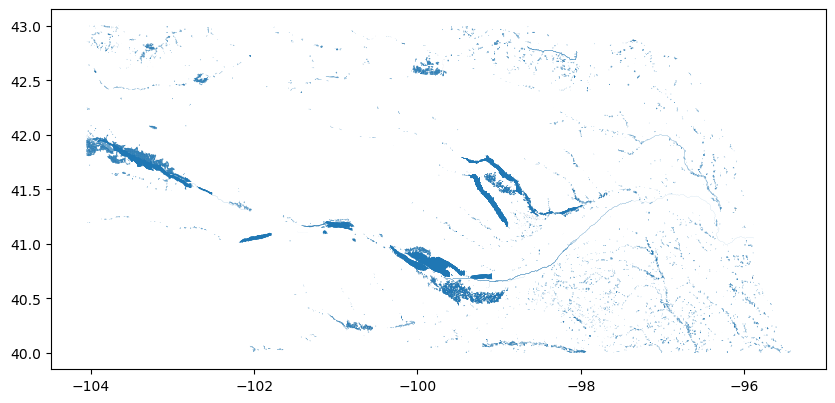

In [15]:
# Plot original geometry
dfinPOU.plot(figsize=(10, 6))

In [16]:
# # simplify the geometry

# # Original coordinate count
# original_coords = dfinPOU.geometry.apply(lambda geom: len(geom.exterior.coords) if geom.geom_type == 'Polygon' else len(geom.coords))

# # Simplify with tolerance and get simplified coordinate count
# dfinPOU.geometry = dfinPOU.geometry.simplify(tolerance=0.0001, preserve_topology=True) # <--- change here
# simplified_geom = dfinPOU.geometry
# simplified_coords = simplified_geom.apply(lambda geom: len(geom.exterior.coords) if geom.geom_type == 'Polygon' else len(geom.coords))

# # Print % coordinate reduction & plot new
# total_before = original_coords.sum()
# total_after = simplified_coords.sum()
# reduction = 100 * (total_before - total_after) / total_before
# print(f"Total coordinate reduction: {reduction:.2f}%")
# dfinPOU.plot(figsize=(10, 6))

In [17]:
# AllocationFlow_CFS, convert GPM to wade CFS

def assignAllocationFlow_CFS(val):
    if val == '' or pd.isnull(val):
        outVal = ''
    else:
        outVal = val / 448.8309375
    return outVal

dfinPOU['in_AllocationFlow_CFS'] = dfinPOU.apply(lambda row: assignAllocationFlow_CFS(row['GallonsPer']), axis=1)
dfinPOU['in_AllocationFlow_CFS'].head(1)

0   0.00000
Name: in_AllocationFlow_CFS, dtype: float64

In [18]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOU['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "NEwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "NEwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "NEwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df['in_WaterSourceName'] = ""
df['in_WaterSourceNativeID'] = "" # auto fill in below if not provdied
df['in_WaterSourceTypeCV'] = "Surface Water"

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = ""
df['in_County'] = ""
df['in_EPSGCodeCV'] = "4326"
df['in_Geometry'] = dfinPOU.geometry
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOU["cent_Latitude"]
df['in_Longitude'] = dfinPOU["cent_Longitude"]
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POU"  # "Place of Use"
df['in_SiteName'] = ""
df['in_SiteNativeID'] = ""
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = ""
df['in_USGSSiteID'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = dfinPOU['in_AllocationFlow_CFS']
df['in_AllocationLegalStatusCV'] = dfinPOU['RightStatu']
df['in_AllocationNativeID'] =  dfinPOU['RightId'].replace("", 0).fillna(0).astype(str).str.lower().str.strip()
df['in_AllocationOwner'] = dfinPOU['FirstName'] + " " + dfinPOU['LastName']
df['in_AllocationPriorityDate'] = dfinPOU['PriorityDa']
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = ""
df['in_BeneficialUseCategory'] = dfinPOU["PurposeOfU"]
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0 # either a 1 or 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = dfinPOU["CurrentTot"]
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = "https://nednr.nebraska.gov/dynamic/WaterRights/WaterRights/SWRDetailPage?RightId=" + df["in_AllocationNativeID"].astype(str)


outPOU = df.copy()
outPOU = outPOU.drop_duplicates().reset_index(drop=True)
print(len(outPOU))
outPOU.head()

104781


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,u0,NEwr_M1,NEwr_V1,NEwr_O1,"POLYGON ((-98.81057 40.09325, -98.80604 40.093...",,Fresh,,,Surface Water,,,,4326,,,,40.09201,-98.80867,,,POU,,,,,,,,,,,,,,,0.00000,Active,1513,Bureau of Reclamation,1954-04-16,,,,,,Irrigation,,,,,,0,,11031.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
1,u0,NEwr_M1,NEwr_V1,NEwr_O1,"POLYGON ((-98.81093 40.09064, -98.81087 40.093...",,Fresh,,,Surface Water,,,,4326,,,,40.09178,-98.81083,,,POU,,,,,,,,,,,,,,,0.00000,Active,1513,Bureau of Reclamation,1954-04-16,,,,,,Irrigation,,,,,,0,,11031.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
2,u1,NEwr_M1,NEwr_V1,NEwr_O1,"POLYGON ((-104.04377 42.00151, -104.0448 41.99...",,Fresh,,,Surface Water,,,,4326,,,,42.00092,-104.04563,,,POU,,,,,,,,,,,,,,,0.15819,Active,2,Steve & Pam Dickey,1933-05-29,,,,,,Irrigation,,,,,,0,,11.50000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
3,u2,NEwr_M1,NEwr_V1,NEwr_O1,"POLYGON ((-103.64621 41.8307, -103.64779 41.83...",,Fresh,,,Surface Water,,,,4326,,,,41.82314,-103.61248,,,POU,,,,,,,,,,,,,,,0.03788,Active,1,Central Irrigation District,1897-03-14,,,,,,Incidental Underground Storage,,,,,,0,,0.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...
4,u3,NEwr_M1,NEwr_V1,NEwr_O1,"POLYGON ((-104.04253 41.99861, -104.04256 41.9...",,Fresh,,,Surface Water,,,,4326,,,,41.99892,-104.04222,,,POU,,,,,,,,,,,,,,,0.00891,Active,3,Charlene I Fitzgerald,1946-06-17,,,,,,Irrigation,,,,,,0,,1.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...


# POD Groundwater Data
- use download csv

In [19]:
# Input File
inputFile = "RawInputData/Groundwater_Wells_DNR.zip"
dfgwinPOD = pd.read_csv(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfgwinPOD:
    dfgwinPOD['WaDEUUID'] = "gd" + dfgwinPOD.index.astype(str)
    dfgwinPOD.to_csv('RawInputData/Groundwater_Wells_DNR.zip', compression=dict(method='zip', archive_name='Groundwater_Wells_DNR.csv'), index=False)

print(len(dfgwinPOD))
dfgwinPOD.head(3)

261710


,X,Y,OBJECTID,WellID,RegistrationNumber,Status,WellUseDescription,NRDName,CountyName,Location,NRDPermit,Acres,SeriesType,PumpRate,PumpColumn_Diameter,PumpDepth,TotalDepth,StaticWaterLevel,PumpingWaterLevel,FirstName,LastName,RegistrationDate,CompletionDate,DecommissionedDate,Latitude,Longitude,URL,LatitudeDMS,LongitudeDMS,OwnerID,GlobalID,GlobalID_1,HeatSystemLoops,WaDEUUID
0,1852456.80688,965102.40075,1,48155,G-040906,Active Registered Well,Irrigation,Upper Elkhorn,Holt,SWSE S17-T29-R16West,,80.00000,Single Project,550.00000,6.00000,,104.00000,8.00000,12.00000,Andrew C,Hytrek,1974/04/16 18:00:00+00,1970/06/16 18:00:00+00,,42.48007,-99.21382,,,,24722,{D03724A9-37CE-42E3-8FC6-0000039DA995},{397DC5F3-2109-4EC1-B917-4580E7895E3D},,gd0
1,2198108.82620,463165.60803,2,208738,G-158079,Inactive Well (Well is not Pumping),Domestic,Central Platte,Hamilton,NENW S23-T13-R6West,,,Single Project,,,,42.00000,6.00000,,Joe,Gustafson,2011/01/10 18:00:00+00,2010/12/03 18:00:00+00,,41.08694,-97.97614,,"41°5'13.000""","-97°58'34.100""",116326,{1A649E7E-BDCD-4320-BF00-00003E3A839A},{749F5611-3CA2-4AE5-A58A-7D791E3E28D9},,gd1
2,1997259.07797,349155.05226,3,15277,G-010421,Active Registered Well,Irrigation,Central Platte,Hall,NWNE S6-T9-R12West,,75.00000,Single Project,1000.00000,9.00000,,62.00000,30.00000,,Alvera,Ohlman,1957/09/17 18:00:00+00,1946/01/01 18:00:00+00,,40.78455,-98.71105,,"40°47'4.390""","-98°42'39.780""",73779,{D593968A-FA33-45AD-BCC7-000040724F69},{18141BAC-8089-4A94-B284-B8552503A11A},,gd2


In [20]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfgwinPOD['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "NEwr_M2" # for groundwater

# Variable Info
df['in_VariableSpecificUUID'] = "NEwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "NEwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df['in_WaterSourceName'] = ""
df['in_WaterSourceNativeID'] = "" # auto fill in below if not provdied
df['in_WaterSourceTypeCV'] = "Groundwater"

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = ""
df['in_County'] = dfgwinPOD['CountyName']
df['in_EPSGCodeCV'] = "4326"
df['in_Geometry'] = ""
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfgwinPOD['Latitude']
df['in_Longitude'] = dfgwinPOD['Longitude']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POD"  # "Point of Diversion"
df['in_SiteName'] = dfgwinPOD['Location']
df['in_SiteNativeID'] = "podgw" + dfgwinPOD['WellID'].astype(str).str.strip()
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = dfgwinPOD['SeriesType']
df['in_StateCV'] = "NE"
df['in_USGSSiteID'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = dfgwinPOD['RegistrationDate']
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = ""
df['in_AllocationLegalStatusCV'] = dfgwinPOD['Status']
df['in_AllocationNativeID'] = dfgwinPOD['RegistrationNumber']
df['in_AllocationOwner'] = dfgwinPOD['FirstName'] + " " + dfgwinPOD['LastName']
df['in_AllocationPriorityDate'] = ""
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = dfgwinPOD['PumpRate']
df['in_BeneficialUseCategory'] = dfgwinPOD['WellUseDescription']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = "10/04/2023"
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = "1"
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = dfgwinPOD['Acres']
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = "https://nednr.nebraska.gov/Dynamic/Wells/Wells/WellDetails?WellId=" + dfgwinPOD['WellID'].astype(str).str.strip()

outgwPOD = df.copy()
outgwPOD = outgwPOD.drop_duplicates().reset_index(drop=True)
print(len(outgwPOD))
outgwPOD.head()

261710


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,gd0,NEwr_M2,NEwr_V1,NEwr_O1,,,Fresh,,,Groundwater,,,Holt,4326,,,,42.48007,-99.21382,,,POD,SWSE S17-T29-R16West,podgw48155,,Single Project,NE,,1974/04/16 18:00:00+00,,,,,,,,,Active Registered Well,G-040906,Andrew C Hytrek,,,,,,550.00000,Irrigation,,,,10/04/2023,,1,,80.00000,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...
1,gd1,NEwr_M2,NEwr_V1,NEwr_O1,,,Fresh,,,Groundwater,,,Hamilton,4326,,,,41.08694,-97.97614,,,POD,NENW S23-T13-R6West,podgw208738,,Single Project,NE,,2011/01/10 18:00:00+00,,,,,,,,,Inactive Well (Well is not Pumping),G-158079,Joe Gustafson,,,,,,,Domestic,,,,10/04/2023,,1,,,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...
2,gd2,NEwr_M2,NEwr_V1,NEwr_O1,,,Fresh,,,Groundwater,,,Hall,4326,,,,40.78455,-98.71105,,,POD,NWNE S6-T9-R12West,podgw15277,,Single Project,NE,,1957/09/17 18:00:00+00,,,,,,,,,Active Registered Well,G-010421,Alvera Ohlman,,,,,,1000.00000,Irrigation,,,,10/04/2023,,1,,75.00000,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...
3,gd3,NEwr_M2,NEwr_V1,NEwr_O1,,,Fresh,,,Groundwater,,,Custer,4326,,,,41.35083,-99.44528,,,POD,SESW S13-T16-R19West,podgw208756,,Single Project,NE,,2011/01/13 18:00:00+00,,,,,,,,,Active Registered Well,G-158090,Paul C & Rebecca A Loy Revocable Trusts,,,,,,20.00000,Livestock,,,,10/04/2023,,1,,,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...
4,gd4,NEwr_M2,NEwr_V1,NEwr_O1,,,Fresh,,,Groundwater,,,York,4326,,,,40.86411,-97.58581,,,POD,NWSE S6-T10-R2West,podgw168669,,Single Project,NE,,2005/06/29 18:00:00+00,,,,,,,,,Active Registered Well,G-134453L,United States Geological Survey,,,,,,,Monitoring (Ground Water Quality),,,,10/04/2023,,1,,,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...


## Concatenate POD and POU Data.  Make needed changes

In [21]:
# Concatenate dataframes
frames = [outPOD, outPOU, outgwPOD]  # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

C:\Users\rjame\AppData\Local\Temp\ipykernel_16940\1028050903.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")


1645871


## Clean Data / data types

In [22]:
# Clean name entries of spcial characters
def removeSpecialCharsFunc(Val):
    Val = str(Val)
    Val = re.sub("[$@&.;/\)(-]", "", Val).title().replace("  ", " ").strip().rstrip(',')
    return Val

In [23]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array(['North Platte River', 'Glenn Springs', 'Schuppe Creek, West', ...,
       'Middle Creek, Trib To', 'Otto Reservoir',
       'Wilson Creek Structure 3C'], dtype=object)

In [24]:
outdf['in_County'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_County']), axis=1)
outdf['in_County'].unique()

array(['Scotts Bluff', 'Morrill', 'Garden', 'Phelps', 'Wyoming', 'Sioux',
       'Banner', 'Kimball', 'Keith', 'Lincoln', 'Mcpherson', 'Deuel',
       'Dawson', 'Gosper', 'Merrick', 'Platte', 'Buffalo', 'Hall',
       'Pawnee', 'Kearney', 'Custer', 'Hamilton', 'Polk', 'Nance',
       'Colorado', 'Dundy', 'Hitchcock', 'Chase', 'Hayes', 'Cass',
       'Red Willow', 'Lancaster', 'Frontier', 'Douglas', 'Furnas',
       'Harlan', 'Franklin', 'Webster', 'Nuckolls', 'Adams', 'Clay',
       'Thayer', 'Jefferson', 'Fillmore', 'Richardson', 'Johnson', 'York',
       'Butler', 'Seward', 'Saline', 'Gage', 'Cheyenne', 'Otoe', 'Nemaha',
       'Cherry', 'Hooker', 'Thomas', 'Blaine', 'Sherman', 'Howard',
       'Valley', 'Loup', 'Garfield', 'Greeley', 'Brown', 'Wheeler',
       'Boone', 'Saunders', 'Colfax', 'Dodge', 'Rock', 'Holt', 'Sarpy',
       'Antelope', 'Madison', 'Burt', 'Stanton', 'Knox', 'Pierce',
       'Wayne', 'Cuming', 'Cedar', 'Dixon', 'Thurston', 'Washington',
       'Box Butte', 'Daw

In [25]:
outdf['in_SiteName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['', 'Swse S17T29R16West', 'Nenw S23T13R6West', ...,
       'Senw S13T5R1West', 'Nwne S36T9R41West', 'Swsw S35T12R13East'],
      dtype=object)

In [26]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['Central Irrigation District', 'Steve Pam Dickey',
       'Charlene I Fitzgerald', ..., 'Union Bank Trust Company',
       'Darlene J Most Revocable Trust', 'Diane Benshoof'], dtype=object)

In [27]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [28]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array(['North Platte River', 'Glenn Springs', 'Schuppe Creek, West', ...,
       'Middle Creek, Trib To', 'Otto Reservoir',
       'Wilson Creek Structure 3C'], dtype=object)

In [29]:
outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array(['Surface Water', 'Groundwater'], dtype=object)

In [30]:
outdf['in_SiteTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteTypeCV']), axis=1)
outdf['in_SiteTypeCV'].unique()

array(['', 'Single Project', 'Connected to pump into a common carrier',
       'Part of a DEQ site plan for spill or underground storage',
       'Monitoring Wells Part of a single site'], dtype=object)

In [31]:
outdf['in_SiteName'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['', 'Swse S17T29R16West', 'Nenw S23T13R6West', ...,
       'Senw S13T5R1West', 'Nwne S36T9R41West', 'Swsw S35T12R13East'],
      dtype=object)

In [32]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: ensureEmptyString(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['Central Irrigation District', 'Steve Pam Dickey',
       'Charlene I Fitzgerald', ..., 'Union Bank Trust Company',
       'Darlene J Most Revocable Trust', 'Diane Benshoof'], dtype=object)

In [33]:
outdf['in_BeneficialUseCategory'] = outdf.apply(lambda row: ensureEmptyString(row['in_BeneficialUseCategory']), axis=1)
uniqueList = list(set([i.strip() for i in ','.join(outdf['in_BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Aquaculture',
 'Commercial/Industrial',
 'Conduct Groundwater',
 'Conduct Surface Water',
 'Cooling',
 'Dewatering (Over 90 Days)',
 'Domestic',
 'Fish & Wildlife',
 'Fish Culture',
 'Flood Control',
 'Ground Heat Exchanger well - Closed Loop Heat Pump well',
 'Heat Pump well - Open Loop Heat Pump Well',
 'Incidental Underground Storage',
 'Induced Groundwater Recharge',
 'Injection',
 'Instream Basin Management',
 'Instream Flow',
 'Intentional Underground Storage',
 'Irrigation',
 'Livestock',
 'Livestock Watering',
 'Maintain Level of a Lake',
 'Manufacturing',
 'Monitoring (Ground Water Quality)',
 'Observation (Ground Water Levels)',
 'Other',
 'Pit (excavation)',
 'Power',
 'Raise Dam',
 'Recharge',
 'Recovery',
 'Storage',
 'Transfer to Instream',
 'Waste Storage',
 'Wetlands']

In [34]:
# Ensure Latitude entry is either numireic or a 0
outdf['in_Latitude'] = pd.to_numeric(outdf['in_Latitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Latitude'].unique()

array([41.85584158, 42.00158085, 41.99952353, ..., 40.01703889,
       40.40389722, 40.40401944])

In [35]:
# Ensure Longitude entry is either numireic or a 0
outdf['in_Longitude'] = pd.to_numeric(outdf['in_Longitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Longitude'].unique()

array([-103.70574234, -104.04617675, -104.04244188, ...,  -97.38177222,
        -97.38186944,  -95.92851111])

In [36]:
# Changing datatype of Priority Date to date fields entry
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf['in_AllocationPriorityDate'], errors = 'coerce')
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf["in_AllocationPriorityDate"].dt.strftime('%m/%d/%Y'))
outdf['in_AllocationPriorityDate'].unique()

<DatetimeArray>
['1897-03-15 00:00:00', '1933-05-29 00:00:00', '1946-06-17 00:00:00',
 '1934-08-03 00:00:00', '1933-03-27 00:00:00', '1959-12-01 00:00:00',
 '1962-08-30 00:00:00', '1960-09-28 00:00:00', '1904-12-23 00:00:00',
 '1960-09-22 00:00:00',
 ...
 '1887-03-14 00:00:00', '1880-07-30 00:00:00', '1895-07-18 00:00:00',
 '1891-03-31 00:00:00', '1898-05-11 00:00:00', '1895-11-10 00:00:00',
 '1896-05-16 00:00:00', '1894-10-30 00:00:00', '1888-05-29 00:00:00',
 '1895-06-17 00:00:00']
Length: 5596, dtype: datetime64[ns]

In [37]:
# Ensure Flow entry is either numireic or a 0
outdf['in_AllocationFlow_CFS'] = pd.to_numeric(outdf['in_AllocationFlow_CFS'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationFlow_CFS'].unique()

array([0.04, 0.16, 0.01, 0.02, 0.38, 0.06, 1.01, 0.33, 0.23, 1.43, 0.5,
       1.63, 0.12, 0.61, 0.86, 0.11, 2.22, 13.0, 0.21, 0.15, 1.28, '',
       0.48, 0.19, 1571.89, 780.53, 191.85, 15.63, 192.56, 0.14, 846.52,
       45.0, 230.05, 0.27, 0.74, 3.07, 2.0, 0.3, 0.79, 1.14, 0.57, 0.43,
       5.14, 0.46, 114.8, 10.0, 3.0, 1.0, 15.0, 1.59, 2.28, 18.19, 4.0,
       14.38, 24.38, 0.17, 2.24, 5.68, 95.93, 81.92, 3.05, 0.4, 2.26,
       66.17, 1.02, 37.76, 42.5, 60.0, 0.09, 20.06, 2.92, 0.67, 30.99,
       1.07, 2.71, 4.91, 0.22, 90.11, 28.57, 0.31, 42.71, 1.11, 59.88,
       0.8, 9.43, 8.93, 5.11, 3.22, 1.48, 0.51, 0.89, 0.88, 1.41, 9.76,
       1.8, 0.26, 0.82, 1.03, 0.29, 1.77, 1.68, 2.57, 1.6, 2.4, 0.64,
       1.57, 0.71, 19.12, 0.08, 0.2, 1.19, 3.99, 1.5, 4.8, 14.19, 2.39,
       0.6, 0.76, 2.3, 0.07, 2.97, 18.57, 12.44, 1.3, 8.69, 2.74, 0.63,
       4.29, 8.77, 14.43, 1.25, 0.85, 11.8, 1.37, 2.19, 31.99, 0.1, 11.64,
       15.24, 27.62, 0.96, 11.17, 0.28, 0.69, 9.59, 4.98, 1.49, 57

In [38]:
# Ensure Volume entry is either numireic or a 0
outdf['in_AllocationVolume_AF'] = pd.to_numeric(outdf['in_AllocationVolume_AF'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationVolume_AF'].unique()

array(['', 550.0, 1000.0, ..., 2850.0, 648.0, 573.0], dtype=object)

In [39]:
# Ensure Irrigated Acreage entry is either numireic or a 0
outdf['in_IrrigatedAcreage'] = pd.to_numeric(outdf['in_IrrigatedAcreage'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_IrrigatedAcreage'].unique()

array(['', 11.5, 1.0, ..., 194.1, 125.17, 98.89], dtype=object)

In [40]:
# Creating WaDE Custom water source native ID for easy water source identification
# use unique WaterSourceName and WaterSourceType values
# ----------------------------------------------------------------------------------------------------

# Create temp in_WaterSourceNativeID dataframe of unique water source.
def assignIdValueFunc(colRowValue):
    string1 = str(colRowValue)
    outstring = "wadeId" + string1
    return outstring

dfTempID = pd.DataFrame()
dfTempID['in_WaterSourceName'] = outdf['in_WaterSourceName'].astype(str).str.strip()
dfTempID['in_WaterSourceTypeCV'] = outdf['in_WaterSourceTypeCV'].astype(str).str.strip()
dfTempID = dfTempID.drop_duplicates()

dfTempCount = pd.DataFrame(index=dfTempID.index)
dfTempCount["Count"] = range(1, len(dfTempCount.index) + 1)
dfTempID['in_WaterSourceNativeID'] = dfTempCount.apply(lambda row: assignIdValueFunc(row['Count']), axis=1)
dfTempID['linkKey'] = dfTempID['in_WaterSourceName'].astype(str) + dfTempID['in_WaterSourceTypeCV'].astype(str)
IdDict = pd.Series(dfTempID.in_WaterSourceNativeID.values, index=dfTempID.linkKey.astype(str)).to_dict()
# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom site native ID
def retrieveIdValueFunc(checkVal, valA, valB):
    checkVal = str(checkVal).strip()
    if checkVal == "":
        linkKeyVal = str(valA).strip() + str(valB).strip()
        outString = IdDict[linkKeyVal]
    else:
        outString = checkVal
    return outString

outdf['in_WaterSourceNativeID'] = outdf.apply(lambda row: retrieveIdValueFunc(row['in_WaterSourceNativeID'], 
                                                                              row['in_WaterSourceName'], row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceNativeID'].unique()

array(['wadeId1', 'wadeId2', 'wadeId3', ..., 'wadeId1430', 'wadeId1431',
       'wadeId1432'], dtype=object)

In [41]:
# Creating WaDE Custom site native ID for easy site identification
# use Unique Latitude, Longitude, SiteName and SiteTypeCV values
# ----------------------------------------------------------------------------------------------------

# Create temp in_SiteNativeID dataframe of unique water source.
def assignIdValueFunc(colRowValue):
    string1 = str(colRowValue)
    outstring = "wadeId" + string1
    return outstring

dfTempID = pd.DataFrame()
dfTempID['in_Latitude'] = outdf['in_Latitude'].astype(str).str.strip()
dfTempID['in_Longitude'] = outdf['in_Longitude'].astype(str).str.strip()
dfTempID['in_SiteName'] = outdf['in_SiteName'].astype(str).str.strip()
dfTempID['in_SiteTypeCV'] = outdf['in_SiteTypeCV'].astype(str).str.strip()
dfTempID = dfTempID.drop_duplicates()

dfTempCount = pd.DataFrame(index=dfTempID.index)
dfTempCount["Count"] = range(1, len(dfTempCount.index) + 1)
dfTempID['in_SiteNativeID'] = dfTempCount.apply(lambda row: assignIdValueFunc(row['Count']), axis=1)
dfTempID['linkKey'] = dfTempID['in_Latitude'].astype(str) + dfTempID['in_Longitude'].astype(str) + dfTempID['in_SiteName'].astype(str)+ dfTempID['in_SiteTypeCV'].astype(str)
IdDict = pd.Series(dfTempID.in_SiteNativeID.values, index=dfTempID.linkKey.astype(str)).to_dict()
# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom site native ID
def retrieveIdValueFunc(checkVal, valA, valB, valC, valD):
    checkVal = str(checkVal).strip()
    if checkVal == "":
        linkKeyVal = str(valA).strip() + str(valB).strip() + str(valC).strip() + str(valD).strip()
        outString = IdDict[linkKeyVal]
    else:
        outString = checkVal
    return outString

outdf['in_SiteNativeID'] = outdf.apply(lambda row: retrieveIdValueFunc(row['in_SiteNativeID'], 
                                                                       row['in_Latitude'], row['in_Longitude'],
                                                                       row['in_SiteName'], row['in_SiteTypeCV']), axis=1)
outdf['in_SiteNativeID'].unique()

array(['wadeId1', 'wadeId2', 'wadeId3', ..., 'podgw282076', 'podgw282079',
       'podgw282077'], dtype=object)

## Drop non-Active AllocationLegalStatusCV Water Rights
- For this {state name / organization}, we don't want water rights that are considered: {enter string entries here}

In [42]:
# drop non-active AllocationLegalStatusCV values specific to that state.

# drop the list
dropLegalStatusList = ["Cancelled"] # enter string entries here

# drop rows from above list
outdf = outdf[outdf.in_AllocationLegalStatusCV.isin(dropLegalStatusList) == False].reset_index(drop=True)

print(len(outdf))
outdf['in_AllocationLegalStatusCV'].unique()

1645871


array(['Active', 'Active Registered Well',
       'Inactive Well (Well is not Pumping)', 'Decommissioned Well',
       'Unregistered Decommissioned well',
       'Suspense (Replacement well, original well not yet abandoned)',
       'Inactive Suspense'], dtype=object)

## Shapefile Data
- For attaching geometry to POU csv inputs.

In [43]:
# # Input File / or use same input as above

gdfin1 = outdf[outdf["in_Geometry"] != ""]
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

104781


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC1dfinPOD,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL,in_HUC12,geometry
1279380,u0,NEwr_M1,NEwr_V1,NEwr_O1,POLYGON ((-98.81056687336246 40.09325242535919...,,Fresh,,wadeId1410,Surface Water,,,,4326,,,,40.09201,-98.80867,,,POU,,wadeId7605,,,,,,,,,,,,,,Active,1513,Bureau Of Reclamation,1954-04-16,,,,,,Irrigation,,,,,,0,,11031.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,,"POLYGON ((-98.81057 40.09325, -98.80604 40.093..."
1279381,u0,NEwr_M1,NEwr_V1,NEwr_O1,POLYGON ((-98.81092780817175 40.09064109541026...,,Fresh,,wadeId1410,Surface Water,,,,4326,,,,40.09178,-98.81083,,,POU,,wadeId7606,,,,,,,,,,,,,,Active,1513,Bureau Of Reclamation,1954-04-16,,,,,,Irrigation,,,,,,0,,11031.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,,"POLYGON ((-98.81093 40.09064, -98.81087 40.093..."
1279382,u1,NEwr_M1,NEwr_V1,NEwr_O1,POLYGON ((-104.04377234471792 42.0015143672942...,,Fresh,,wadeId1410,Surface Water,,,,4326,,,,42.00092,-104.04563,,,POU,,wadeId7607,,,,,,,,,,,,,0.16000,Active,2,Steve Pam Dickey,1933-05-29,,,,,,Irrigation,,,,,,0,,11.50000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,,"POLYGON ((-104.04377 42.00151, -104.0448 41.99..."
1279383,u2,NEwr_M1,NEwr_V1,NEwr_O1,POLYGON ((-103.64621050111373 41.8307031030657...,,Fresh,,wadeId1410,Surface Water,,,,4326,,,,41.82314,-103.61248,,,POU,,wadeId7608,,,,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-14,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,,"POLYGON ((-103.64621 41.8307, -103.64779 41.83..."
1279384,u3,NEwr_M1,NEwr_V1,NEwr_O1,POLYGON ((-104.04253070472822 41.9986066936440...,,Fresh,,wadeId1410,Surface Water,,,,4326,,,,41.99892,-104.04222,,,POU,,wadeId7609,,,,,,,,,,,,,0.01000,Active,3,Charlene I Fitzgerald,1946-06-17,,,,,,Irrigation,,,,,,0,,1.00000,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,,"POLYGON ((-104.04253 41.99861, -104.04256 41.9..."


<Axes: >

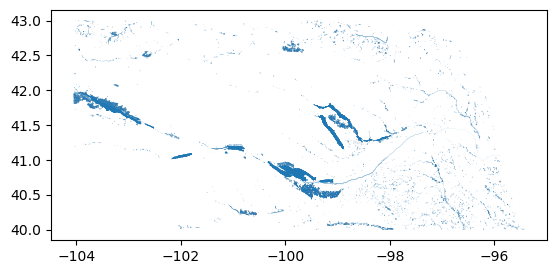

In [44]:
# plot shape info to map
gdfin1.plot()

In [45]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_SiteNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_SiteNativeID'] =  gdfin1["in_SiteNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

69741


,in_SiteNativeID,geometry
0,wadeId7605,POLYGON ((-98.81056687336246 40.09325242535919...
1,wadeId7606,POLYGON ((-98.81092780817175 40.09064109541026...
2,wadeId7607,POLYGON ((-104.04377234471792 42.0015143672942...
3,wadeId7608,POLYGON ((-103.64621050111373 41.8307031030657...
4,wadeId7609,POLYGON ((-104.04253070472822 41.9986066936440...


## Export Data

In [46]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645871 entries, 0 to 1645870
Data columns (total 63 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   WaDEUUID                                      1645871 non-null  object        
 1   in_MethodUUID                                 1645871 non-null  object        
 2   in_VariableSpecificUUID                       1645871 non-null  object        
 3   in_OrganizationUUID                           1645871 non-null  object        
 4   in_GNISFeatureNameCV                          1645871 non-null  object        
 5   in_WaterQualityIndicatorCV                    1645871 non-null  object        
 6   in_WaterSourceName                            1645871 non-null  object        
 7   in_WaterSourceNativeID                        1645871 non-null  object        
 8   in_WaterSourceTypeCV                      

In [47]:
outdf

,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC1dfinPOD,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL,in_HUC12
0,d0,NEwr_M1,NEwr_V1,NEwr_O1,,Fresh,North Platte River,wadeId1,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,wadeId1,,,NE,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-15,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,
1,d1,NEwr_M1,NEwr_V1,NEwr_O1,,Fresh,North Platte River,wadeId1,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,wadeId1,,,NE,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-15,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,
2,d2,NEwr_M1,NEwr_V1,NEwr_O1,,Fresh,North Platte River,wadeId1,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,wadeId1,,,NE,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-15,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,
3,d3,NEwr_M1,NEwr_V1,NEwr_O1,,Fresh,North Platte River,wadeId1,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,wadeId1,,,NE,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-15,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,
4,d4,NEwr_M1,NEwr_V1,NEwr_O1,,Fresh,North Platte River,wadeId1,Surface Water,,,Scotts Bluff,4326,,101800090810.00000,,41.85584,-103.70574,,,POD,,wadeId1,,,NE,,,,,,,,,,0.04000,Active,1,Central Irrigation District,1897-03-15,,,,,,Incidental Underground Storage,,,,,,0,,,,,,,,,,https://nednr.nebraska.gov/dynamic/WaterRights...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645866,gd261705,NEwr_M2,NEwr_V1,NEwr_O1,,Fresh,,wadeId1432,Groundwater,,,Fillmore,4326,,,,40.40390,-97.38177,,,POD,Senw S13T5R1West,podgw282075,,Single Project,NE,,,,,,,,,,,Unregistered Decommissioned well,,Darlene J Most Revocable Trust,NaT,,,,,,Livestock,,,,10/04/2023,,1,,,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...,
1645867,gd261706,NEwr_M2,NEwr_V1,NEwr_O1,,Fresh,,wadeId1432,Groundwater,,,Perkins,4326,,,,40.71111,-101.93883,,,POD,Nwne S36T9R41West,podgw282078,,Single Project,NE,,,,,,,,,,,Unregistered Decommissioned well,,Nebraska Board Of Educational Lands Funds,NaT,,,,,,Livestock,,,,10/04/2023,,1,,,,,,,,,,https://nednr.nebraska.gov/Dynamic/Wells/Wells...,
1645868,gd261707,NEwr_M2,NEwr_V1,NEwr_O1,,Fresh,,wadeId1432,Groundwate

In [48]:
# Export the output dataframe
# change output name / abbreviation to match native state provdier and wade data type 
outdf.to_csv('RawInputData/Pwr_Main.zip', compression=dict(method='zip', archive_name='Pwr_Main.csv'), index=False)  # The output, save as a zip
goutdf1.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.